In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
#N**2 RVs corresponding to 4 sets of likelihood: x_l,x_r | z_l,z_r = 0,0; 0,1/N; 0,2/N; 0,3/N etc
# dimension of image: D
# no. basis: N
# sigma_n: added noise to image
# sigma_y: std of prior on activation

In [3]:
def likelihood(x_l, x_r, W, sigma_n, sigma_y, z_l, z_r):
    N = len(x_l)
    I = np.eye(N)
    cov_lr_0  = np.hstack((z_l**2*sigma_y**2*W@W.T + sigma_n**2*I, z_l*z_r*sigma_y**2*W@W.T))
    cov_lr_1 = np.hstack((z_l*z_r*sigma_y**2*W@W.T, z_r**2*sigma_y**2*W@W.T + sigma_n**2*I))
    cov_lr = np.vstack((cov_lr_0, cov_lr_1)) + np.eye(2*N)*10**(-12)
    
    rv = stats.multivariate_normal(mean=None, cov = cov_lr)
    return rv.pdf(np.hstack((x_l,x_r)))
    

In [4]:
def post(x_l, x_r, W, sigma_n, sigma_y, z_l_list, z_r_list):
    post_array = np.zeros((len(z_l_list),len(z_l_list)))
    for i in range(len(z_l_list)):
        for j in range(len(z_l_list)):
            post_array[i,j] = likelihood(x_l, x_r, W, sigma_n, sigma_y, z_l_list[i], z_r_list[j])
    return post_array/np.sum(np.sum(post_array))

In [7]:
#test: 2 level
z_l_t = np.array([0,1])
z_r_t = np.array([0,1])
x_l_t = np.array([1,0])
theta = 2*np.pi/3
#x_r_t = np.array([np.cos(theta),np.sin(theta)])
x_r_t = np.array([0.2,(1-0.2**2)**0.5])
W = np.eye(2)
post_list = []

for i in range(100):
    ci  = i*0.1
    x_li = ci*x_l_t
    x_ri = ci*x_r_t
    post_list.append(post(x_li, x_ri, W, 0.2, 20, z_l_t, z_r_t))

post_list = np.array(post_list).reshape(100,4)

/var/folders/04/wzq37d2s3bv87g77m67thbk80000gn/T/ipykernel_39009/2026093129.py:6: RuntimeWarning: invalid value encountered in true_divide
  return post_array/np.sum(np.sum(post_array))


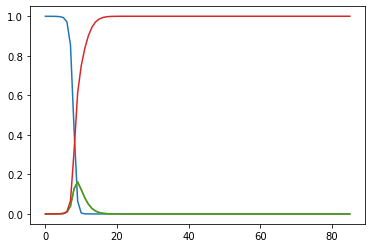

In [8]:
plt.plot(post_list)

In [9]:
#3 level
#test: 2 level
z_l_t = np.array([0,0.33,0.67,1])
z_r_t = np.array([0,0.33,0.67,1])
x_r_t = np.array([1,0])
#theta = 2*np.pi/3
#x_r_t = np.array([np.cos(theta),np.sin(theta)])
x_l_t = np.array([0.2,(1-0.2**2)**0.5])
W = np.eye(2)
post_list = []

for i in range(100):
    ci  = i*0.1
    x_li = ci*x_l_t
    x_ri = ci*x_r_t
    post_list.append(post(x_li, x_ri, W, 0.2, 2, z_l_t, z_r_t))

post_list = np.array(post_list).reshape(100,16)

/var/folders/04/wzq37d2s3bv87g77m67thbk80000gn/T/ipykernel_39009/2026093129.py:6: RuntimeWarning: invalid value encountered in true_divide
  return post_array/np.sum(np.sum(post_array))


In [10]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

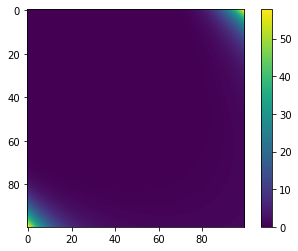

In [11]:
#3 level
#test: N level
n  = 100
z_l_t = np.arange(n)/(n-1)
z_r_t = np.arange(n)/(n-1)

x_r_t = 7*np.array([1,0])
x_l_t = 7*np.array([-0.01,(1-0.01**2)**0.5])
W = np.eye(2)
A =post(x_l_t, x_r_t, W, 0.2, 2, z_l_t, z_r_t)

plt.imshow(A*n**2)
plt.colorbar()